In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('CARAMELO.csv', sep=';')

In [ ]:
print(df.info())
#foi observado que a coluna de datas estavam como tipo objeto e seria necessario converter para o formato de datas datetime
#coluna valor de venda , esta como objeto , e será necessario convertever para float

In [4]:
df['Data da Compra'] = pd.to_datetime(df['Data da Compra'], dayfirst=True)
df['Data da Entrega'] = pd.to_datetime(df['Data da Entrega'], dayfirst=True)
#Aqui converte as colunas citadas para data e o dayfirst coloca o dia em primeiro na data
df['Valor de Venda'] = df['Valor de Venda'].str.replace(',','.').astype(float)
#str.replace(',', '.') troca vírgula por ponto.
#astype(float) converte para número decimal (float).


In [5]:
df_rj = df[df['Estado Loja'] == 'RJ']
#Novo df criado para mostrar somente lojas no estado do RJ
venda_por_cidade_rj = df_rj.groupby('Cidade Loja')['Valor de Venda'].sum().reset_index()

In [41]:
print(venda_por_cidade_rj)


             Cidade Loja  Valor de Venda
0  Campos dos Goytacazes     16643298.81
1         Rio de Janeiro     25747612.70


In [6]:
venda_por_cidade_loja = df.groupby('Cidade Loja')['Valor de Venda'].sum().reset_index()
venda_por_cidade_loja = venda_por_cidade_loja.sort_values(by='Valor de Venda', ascending=False)
print(venda_por_cidade_loja)



              Cidade Loja  Valor de Venda
9          Rio de Janeiro     25747612.70
12               Sorocaba     23136406.31
2   Campos dos Goytacazes     16643298.81
4                Contagem     16396322.17
13             Uberlândia      9617626.31
3           Caxias do Sul      8458472.88
7            Porto Alegre      7958426.67
8          Ribeirão Preto      7780460.75
10               Salvador      7486069.30
0                Camaçari      6990635.97
11                 Santos      6938690.85
1                Campinas      6746718.51
5           Novo Hamburgo      6745646.45
6                 Pelotas      6539116.94


In [7]:
media_venda_categoria = df.groupby('Categoria Produto')['Valor de Venda'].mean().reset_index()
media_venda_categoria = media_venda_categoria.sort_values(by='Valor de Venda', ascending=False)
print(media_venda_categoria)


  Categoria Produto  Valor de Venda
1       Eletrônicos     5084.322521
3            Móveis     2543.021620
4            Roupas      268.037649
2            Livros      108.031487
0         Alimentos       26.691989


In [8]:
eletronicos = df[df['Categoria Produto'] == 'Eletrônicos']
venda_por_marca_eletronicos = eletronicos.groupby('Marca')['Valor de Venda'].sum().reset_index()
venda_por_marca_eletronicos = venda_por_marca_eletronicos.sort_values(by='Valor de Venda', ascending=False)
print(venda_por_marca_eletronicos)


       Marca  Valor de Venda
0      Apple     29767990.28
2         HP     20096928.50
5       Sony     19789108.08
4  Microsoft     19517697.15
1       Dell     10127483.74
3     Lenovo      9886618.38


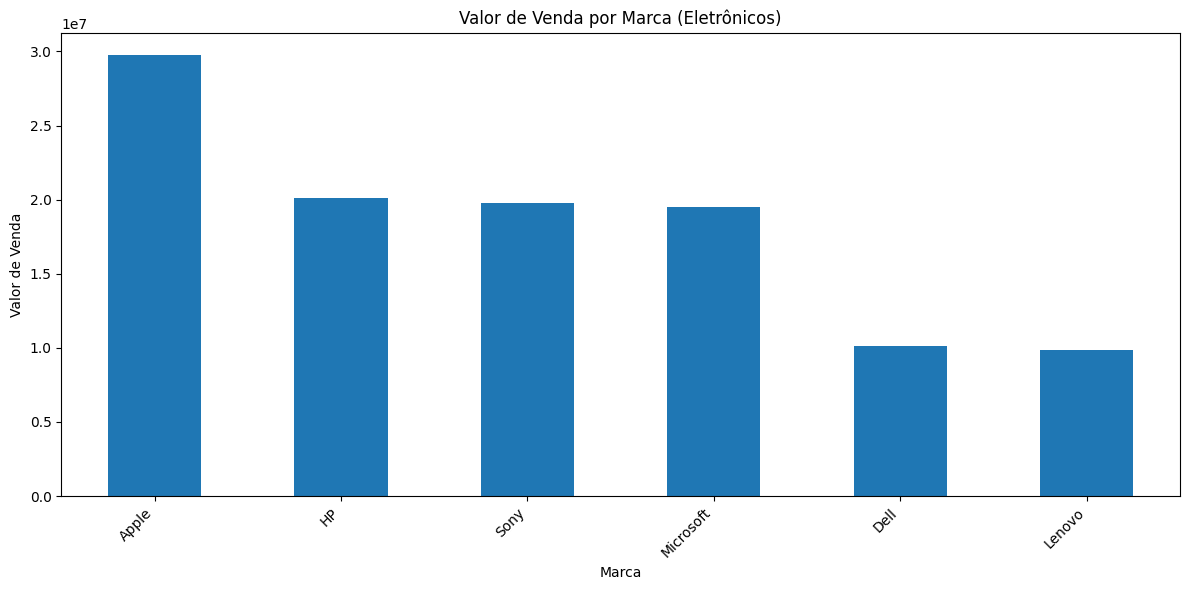

In [12]:
venda_por_marca_eletronicos.plot(kind='bar', x='Marca', y='Valor de Venda', figsize=(12,6), legend=False)

plt.title('Valor de Venda por Marca (Eletrônicos)')
plt.xlabel('Marca')
plt.ylabel('Valor de Venda')
plt.xticks(rotation=45, ha='right')  # gira os nomes para não sobrepor
plt.tight_layout()
plt.show()
